Latar Belakang dari Dataset Penjualan Mobil :
- Keterkaitan Fitur Mobil: Menyediakan informasi tentang hubungan antara berbagai fitur mobil, seperti model, tahun keluaran, daya kuda (hp), berat, dan
  harga. Hal ini dapat membantu mengidentifikasi pola atau korelasi yang dapat digunakan untuk pengambilan keputusan lebih lanjut.
- Pemahaman Variabilitas Harga: Memberikan wawasan tentang variasi harga mobil berdasarkan atribut-atribut tertentu. Ini dapat melibatkan penelusuran
  perbedaan harga antara mobil dengan spesifikasi yang serupa atau pengidentifikasian faktor-faktor utama yang mempengaruhi harga.

Tujuan dari Dataset Penjualan Mobil :
- Melakukan analisis tren harga mobil berdasarkan model dan tahun keluaran. Dengan melihat perubahan harga rata-rata tiap model mobil sepanjang
  beberapa tahun, Anda bisa mempelajari bagaimana harga mobil cenderung berubah seiring waktu. 
- Memvisualisasikan data untuk melihat distribusi dan perbandingan harga mobil berdasarkan model, tahun, dan spesifikasi lainnya.

MENAMPILKAN ISI DARI DATASET

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Sport car price.csv')
print(df.head().to_string(index=False))

EKSPLORASI DATA:

- Menambahkan kolom country (asal negara tiap merek)
- Memeriksa jumlah baris dan kolom
- Menampilkan data teratas
- Menampilkan tipe data tiap kolom
- Memeriksa missing value / data kosong pada setiap kolom 

In [ ]:
import pandas as pd

df['Country'] = df['Car Make'].apply(lambda nama: {
'Porsche': 'Jerman',
'Lamborghini': 'Italia',
'Ferrari': 'Italia',
'Audi': 'Jerman',
'McLaren': 'Inggris',
'BMW': 'Jerman',
'Mercedes-Benz': 'Jerman',
'Mercedes-AMG': 'Jerman',
'Chevrolet': 'Amerika',
'Ford': 'Amerika',
'Nissan': 'Jepang',
'Aston Martin': 'Inggris',
'Bugatti': 'Prancis',
'Dodge': 'Amerika',
'Jaguar': 'Inggris',
'Koenigsegg': 'Swedia',
'Lexus': 'Jepang',
'Lotus': 'Inggris',
'Maserati': 'Italia',
'Pagani': 'Italia',
'Rimac': 'Kroasia',
'Rolls-Royce': 'Inggris',
'Tesla': 'Amerika',
'Toyota': 'Jepang',
'TVR': 'Inggris',
'Ultima': 'Inggris',
'W Motors': 'Lebanon',
'Alpine': 'Prancis',
'Alfa Romeo': 'Italia',
'Bentley': 'Inggris',
'Subaru': 'Jepang',
'Acura': 'Jepang',
'Ariel': 'Inggris',
'Kia': 'Korea Selatan',
'Pininfarina': 'Italia',
'Shelby': 'Amerika',
'Mazda': 'Jepang',
}.get(nama, 'Tidak Diketahui'))

df.to_csv('Sport car price updated.csv', index=False)
    
baris, kolom = df.shape
print(f"Data frame memiliki {baris} baris dan {kolom} kolom\n")
    
jumlah_data_teratas = df.head().to_string(index=False) 
print(f"Jumlah data teratas:\n{jumlah_data_teratas}\n")
    
tipe_data = df.dtypes
print(f"Tipe data setiap kolom:\n{tipe_data}\n")
    
data_kosong = df.isnull().sum().sum()
print(f"Jumlah Data kosong pada setiap kolom:{data_kosong}\n")
    
    


DATA CLEANING:

- Cek Outlier 
- Visualisasi Distribusi pada setiap kolom

In [ ]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# df['Price (in USD)'] = df['Price (in USD)'].str.replace(',','').astype(float)

numeric_cols = df.select_dtypes(include=[np.number])

z = np.abs(stats.zscore(numeric_cols))
df = df[(z < 3).all(axis=1)]

print(df.to_string(index=False))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, col in enumerate(df.columns):
    sns.histplot(x=df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribusi dari {col}")
    
plt.tight_layout()
plt.show()

ANALISIS DATA:

- Analisis tren harga mobil berdasarkan model dan tahun keluaran

In [16]:
import pandas as pd

grouped = df.groupby(['Car Make','Car Model', 'Year'])['Price (in USD)'].mean().reset_index()
        
print(grouped.sort_values("Car Model"))

df.dtypes
                            

        Car Make    Car Model  Year  Price (in USD)
178     Polestar            1  2021   155000.000000
173       Nissan         370Z  2021    30496.111111
174       Nissan   370Z Coupe  2020    30090.000000
176       Nissan   370Z Nismo  2021    46164.000000
175       Nissan   370Z Nismo  2020    46498.750000
..           ...          ...   ...             ...
207  Rolls-Royce       Wraith  2021   331935.714286
56           BMW      Z4 M40i  2022    63700.000000
57           BMW  Z4 Roadster  2022    50000.000000
59           BMW           i8  2022   147833.333333
58           BMW           i8  2020   148500.000000

[221 rows x 4 columns]


Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)             object
Horsepower                  object
Torque (lb-ft)              object
0-60 MPH Time (seconds)     object
Price (in USD)             float64
Country                     object
dtype: object

VISUALISASI:
- Memvisualisasikan data untuk melihat distribusi dan perbandingan harga mobil berdasarkan model, tahun, dan spesifikasi lainnya.

Visualisasi Data Latar Belakang nomor 2

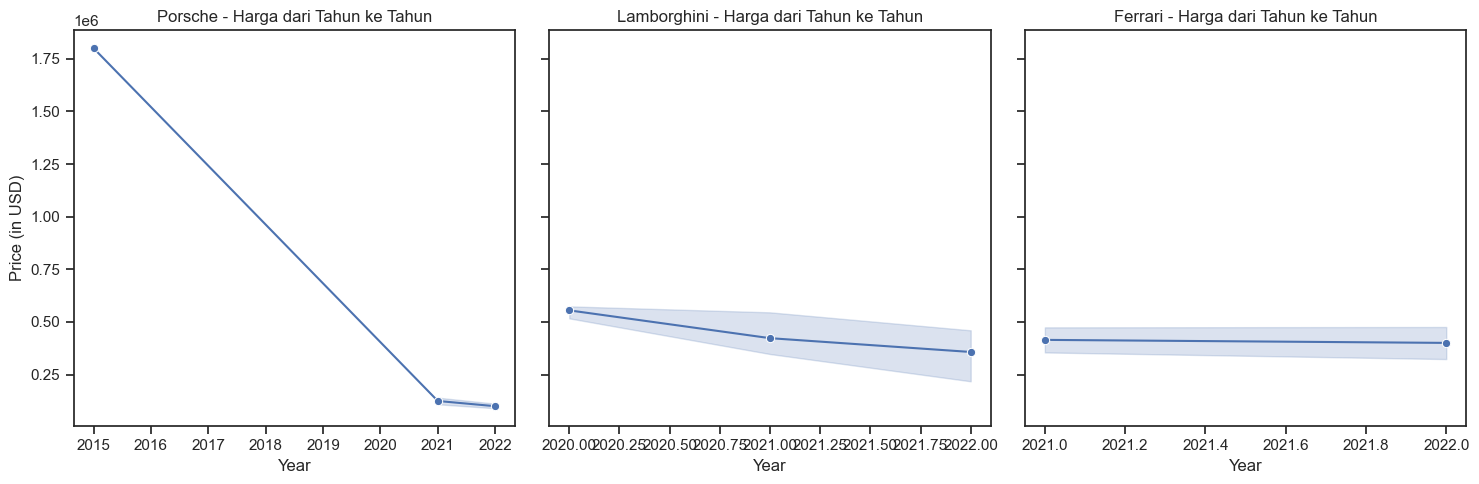

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membaca data dari file CSV
df = pd.read_csv('Sport car price updated.csv')

# Memilih hanya data untuk tiga mobil: Porsche, Lamborghini, Ferrari
selected_cars = df[df['Car Make'].isin(['Porsche', 'Lamborghini', 'Ferrari'])]

# Mengubah format 'Price (in USD)' dari string ke numeric menggunakan NumPy
selected_cars.loc[:, 'Price (in USD)'] = selected_cars['Price (in USD)'].replace(r'[^\d.]', '', regex=True).astype(float)

# Membuat subplot perbandingan harga dari tahun ke tahun untuk setiap mobil
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for i, (car_make, ax) in enumerate(zip(selected_cars['Car Make'].unique(), axes.flatten())):
    car_data = selected_cars[selected_cars['Car Make'] == car_make]
    sns.lineplot(x='Year', y='Price (in USD)', data=car_data, marker='o', ax=ax)
    ax.set_title(f'{car_make} - Harga dari Tahun ke Tahun')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price (in USD)')

plt.tight_layout()
plt.show()


Visualisasi Data Tujuan nomor 1

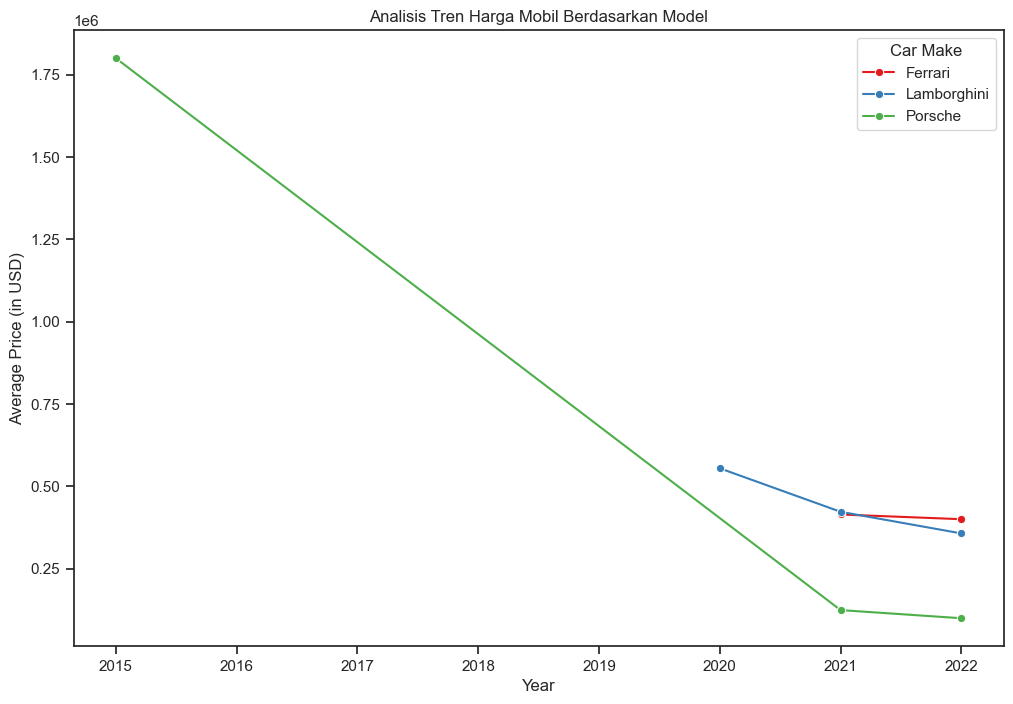

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membaca data dari file CSV
df = pd.read_csv('Sport car price updated.csv')

# Memilih hanya data untuk tiga mobil: Porsche, Lamborghini, Ferrari
selected_cars = df[df['Car Make'].isin(['Porsche', 'Lamborghini', 'Ferrari'])]

# Mengubah format 'Price (in USD)' dari string ke numeric menggunakan NumPy
selected_cars.loc[:, 'Price (in USD)'] = selected_cars['Price (in USD)'].replace(r'[^\d.]', '', regex=True).astype(float)

# Membuat subplot analisis tren harga berdasarkan model
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Price (in USD)', hue='Car Make', data=selected_cars.groupby(['Car Make', 'Year'])['Price (in USD)'].mean().reset_index(), err_style=None, marker='o', palette='Set1')
plt.title('Analisis Tren Harga Mobil Berdasarkan Model')
plt.xlabel('Year')
plt.ylabel('Average Price (in USD)')
plt.legend(title='Car Make')
plt.show()
